# Rossman Store Sales

In [128]:
#引入所需要的库
import numpy as np
import pandas as pd
from time import time
import datetime
import matplotlib.pyplot as plt
from IPython.display import display
# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

In [129]:
#导入数据
data = pd.read_csv('store.csv')
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [130]:
#导入训练集观察数据
train = pd.read_csv('train.csv', parse_dates=['Date'], low_memory=False)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [131]:
#拆分Date
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Day']=train['Date'].dt.day
train['WeekOfYear']=train['Date'].dt.weekofyear
train.drop('Date',axis=1, inplace=True)

In [132]:
#测试集
test = pd.read_csv('test.csv', parse_dates=['Date'])
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [133]:
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day']=test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.weekofyear
test.drop('Date',axis=1, inplace=True)

In [134]:
#合并数据集 train&store
train_raw = pd.merge(data, train, on='Store', how='right')
train_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5263,555,1,1,0,1,2015,7,31,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5020,546,1,1,0,1,2015,7,30,31
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,4782,523,1,1,0,1,2015,7,29,31
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5011,560,1,1,0,1,2015,7,28,31
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,6102,612,1,1,0,1,2015,7,27,31


In [135]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store                        1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null float64
PromoInterval                509178 non-null object
DayOfWeek                    1017209 non-null int64
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null 

In [138]:
#合并test&store
test_raw = pd.merge(data, test, on='Store', how='right')
test_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,1.0,1,0,0,2015,9,17,38
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,1.0,1,0,0,2015,9,16,38
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,1.0,1,0,0,2015,9,15,38
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,1.0,1,0,0,2015,9,14,38
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,0.0,0,0,0,2015,9,13,37


In [139]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 20 columns):
Store                        41088 non-null int64
StoreType                    41088 non-null object
Assortment                   41088 non-null object
CompetitionDistance          40992 non-null float64
CompetitionOpenSinceMonth    25872 non-null float64
CompetitionOpenSinceYear     25872 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              23856 non-null float64
Promo2SinceYear              23856 non-null float64
PromoInterval                23856 non-null object
Id                           41088 non-null int64
DayOfWeek                    41088 non-null int64
Open                         41077 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null object
SchoolHoliday                41088 non-null int64
Year                         41088 non-null int64
Month                    

In [140]:
#移除销售额为0的数据
train_raw = train_raw[train_raw.Sales > 0]
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 21 columns):
Store                        844338 non-null int64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          842152 non-null float64
CompetitionOpenSinceMonth    575738 non-null float64
CompetitionOpenSinceYear     575738 non-null float64
Promo2                       844338 non-null int64
Promo2SinceWeek              421046 non-null float64
Promo2SinceYear              421046 non-null float64
PromoInterval                421046 non-null object
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null object
SchoolHoliday                844338 non-null int64
Year   

In [141]:
train_raw.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,844338.000000,842152.000000,575738.000000,575738.000000,844338.000000,421046.000000,421046.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,5458.156627,7.224842,2008.697753,0.498670,23.254177,2011.753929,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946
std,321.730861,7809.573181,3.210118,5.978064,0.499999,14.100647,1.660946,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931
min,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000
25%,280.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000
50%,558.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000
75%,837.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000


In [142]:
#将test中open为空的填充为1
test_raw['Open'].fillna(1, inplace=True)


In [143]:
test_raw.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Id,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000
mean,555.899533,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926,20544.500000,3.979167,0.854361,0.395833,0.443487,2015.0,8.354167,13.520833,34.645833
std,320.274496,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166,11861.228267,2.015481,0.352748,0.489035,0.496802,0.0,0.478266,8.448450,2.015481
min,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2015.0,8.000000,1.000000,31.000000
25%,279.750000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,10272.750000,2.000000,1.000000,0.000000,0.000000,2015.0,8.000000,6.750000,33.000000
50%,553.500000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000,20544.500000,4.000000,1.000000,0.000000,0.000000,2015.0,8.000000,12.500000,35.000000
75%,832.250000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000,30816.250000,6.000000,1.000000,1.000000,1.000000,2015.0,9.000000,19.250000,36.000000
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000,41088.000000,7.000000,1.000000,1.000000,1.000000,2015.0,9.000000,31.000000,38.000000


## 一、初步进行可视化探索

#### 1.销售情况

In [14]:
import seaborn as sns

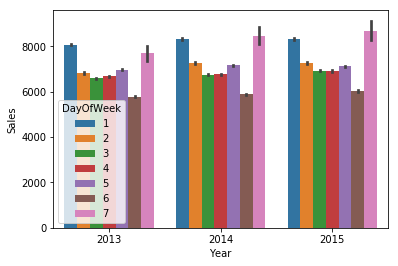

In [15]:
sns.barplot(x='Year', y='Sales', hue='DayOfWeek', data=train_raw)

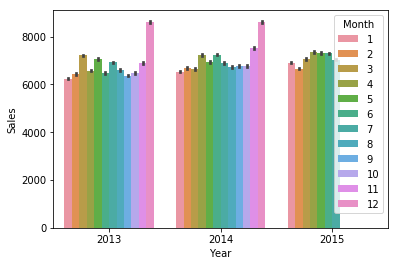

In [16]:
sns.barplot(x='Year',  y='Sales', hue='Month', data=train_raw)

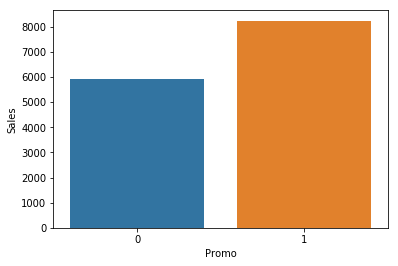

In [17]:
sns.barplot(x='Promo',  y='Sales', data=train_raw)

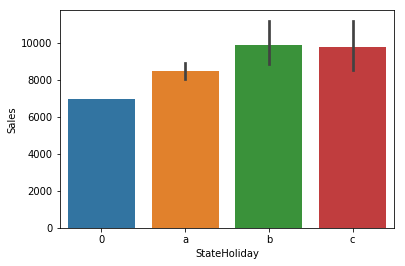

In [18]:
sns.barplot(x='StateHoliday',  y='Sales', data=train_raw)

从上图可以看出销售量逐年递增；按月份来看，12月的销售额最多；按周来看，星期天的销售额相对较高；复活节和圣诞节销售额较大；促销能促进销售。

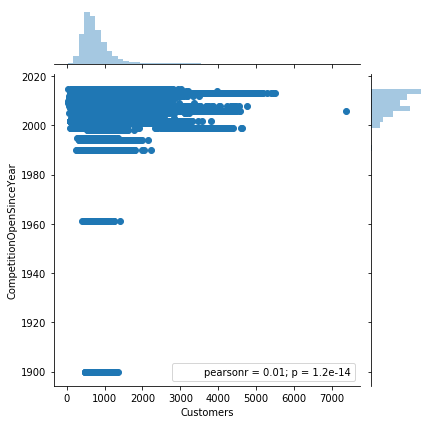

In [19]:
sns.jointplot(x='Customers', y='CompetitionOpenSinceYear', data=train_raw)

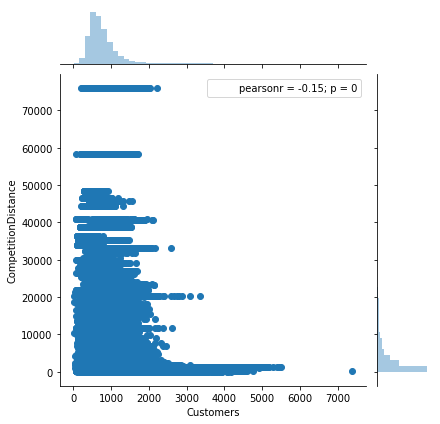

In [20]:
sns.jointplot(x='Customers', y='CompetitionDistance', data=train_raw)

## 二、数据处理

In [144]:
#整理StateHoliday、StoreType、Assortment
dic = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train_raw.StateHoliday.replace(dic, inplace=True)
train_raw.StoreType.replace(dic, inplace=True)
train_raw.Assortment.replace(dic, inplace=True)

test_raw.StateHoliday.replace(dic, inplace=True)
test_raw.StoreType.replace(dic, inplace=True)
test_raw.Assortment.replace(dic, inplace=True)

In [145]:
#处理Competition相关指标，空值默认附没有竞争对手，填入99999
train_raw['CompetitionDistance']=train_raw['CompetitionDistance'].fillna(99999)

test_raw['CompetitionDistance']=test_raw['CompetitionDistance'].fillna(99999)

In [146]:
#将CompetitionDistan做log转换
train_raw['CompetitionDistance'] = np.log(train_raw['CompetitionDistance'])

test_raw['CompetitionDistance'] = np.log(test_raw['CompetitionDistance'])

In [147]:
#对sales进行log转换
log_sales = np.log(train_raw['Sales'])
train_raw['log_sales'] = log_sales

In [148]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 22 columns):
Store                        844338 non-null int64
StoreType                    844338 non-null int64
Assortment                   844338 non-null int64
CompetitionDistance          844338 non-null float64
CompetitionOpenSinceMonth    575738 non-null float64
CompetitionOpenSinceYear     575738 non-null float64
Promo2                       844338 non-null int64
Promo2SinceWeek              421046 non-null float64
Promo2SinceYear              421046 non-null float64
PromoInterval                421046 non-null object
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null int64
SchoolHoliday                844338 non-null int64
Year      

In [149]:
features_drop = train_raw[['PromoInterval','Promo2SinceYear','Promo2SinceWeek','Customers', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales']]
features = train_raw.drop(features_drop, axis=1)


In [150]:
features.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,log_sales
0,1,3,1,7.146772,0,5,1,1,0,1,2015,7,31,31,8.568456
1,1,3,1,7.146772,0,4,1,1,0,1,2015,7,30,31,8.521185
2,1,3,1,7.146772,0,3,1,1,0,1,2015,7,29,31,8.472614
3,1,3,1,7.146772,0,2,1,1,0,1,2015,7,28,31,8.519391
4,1,3,1,7.146772,0,1,1,1,0,1,2015,7,27,31,8.716372


In [151]:
log_sales = features['log_sales']
features = features.drop('log_sales', axis=1)

In [152]:
features.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,3,1,7.146772,0,5,1,1,0,1,2015,7,31,31
1,1,3,1,7.146772,0,4,1,1,0,1,2015,7,30,31
2,1,3,1,7.146772,0,3,1,1,0,1,2015,7,29,31
3,1,3,1,7.146772,0,2,1,1,0,1,2015,7,28,31
4,1,3,1,7.146772,0,1,1,1,0,1,2015,7,27,31


In [153]:
log_sales.head()

0    8.568456
1    8.521185
2    8.472614
3    8.519391
4    8.716372
Name: log_sales, dtype: float64

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, log_sales, test_size=0.15, random_state=1)
print(X_train.shape, X_test.shape)

((717687, 14), (126651, 14))


In [34]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))


In [35]:
#引入XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

#模型参数设置
clf = XGBRegressor(max_depth=10, 
                    learning_rate=0.1,
                    objective='reg:linear',
                    n_estimators=100, 
                    min_child_weight=1, 
                    subsample=0.8,
                    colsample_bytree=0.8)
eval_set = [(X_test, y_test), (X_train, y_train)]
starttime = datetime.datetime.now()
clf.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()

yhat = np.exp(clf.predict(X_test))
rmspe = rmspe(yhat, np.exp(y_test))
print(endtime - starttime).seconds
print('RMSPE: {:.6f}'.format(rmspe))


[0]	validation_0-rmse:7.44289	validation_1-rmse:7.44335
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:6.70039	validation_1-rmse:6.70083
[2]	validation_0-rmse:6.03221	validation_1-rmse:6.03266
[3]	validation_0-rmse:5.43112	validation_1-rmse:5.43156
[4]	validation_0-rmse:4.89017	validation_1-rmse:4.89057
[5]	validation_0-rmse:4.40362	validation_1-rmse:4.404
[6]	validation_0-rmse:3.96586	validation_1-rmse:3.96627
[7]	validation_0-rmse:3.57205	validation_1-rmse:3.57245
[8]	validation_0-rmse:3.21783	validation_1-rmse:3.21821
[9]	validation_0-rmse:2.8993	validation_1-rmse:2.89963
[10]	validation_0-rmse:2.61281	validation_1-rmse:2.61308
[11]	validation_0-rmse:2.35546	validation_1-rmse:2.35569
[12]	validation_0-rmse:2.12406	validation_1-rmse:2.12426
[13]	validation_0-rmse:1.91629	validation_1-rmse:1.91648
[14]	validation_0-rmse:1.72971	validation_1-rmse:1.72986

In [36]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [37]:
clf1 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=500, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_test, y_test), (X_train, y_train)]

starttime = datetime.datetime.now()
clf1.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf1.predict(X_test))
rmspe = rmspe(yhat, np.exp(y_test))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds


[0]	validation_0-rmse:7.85546	validation_1-rmse:7.85595
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46353	validation_1-rmse:7.464
[2]	validation_0-rmse:7.09118	validation_1-rmse:7.09167
[3]	validation_0-rmse:6.73756	validation_1-rmse:6.73803
[4]	validation_0-rmse:6.40158	validation_1-rmse:6.40203
[5]	validation_0-rmse:6.08251	validation_1-rmse:6.08296
[6]	validation_0-rmse:5.77943	validation_1-rmse:5.77988
[7]	validation_0-rmse:5.49151	validation_1-rmse:5.49197
[8]	validation_0-rmse:5.21799	validation_1-rmse:5.21843
[9]	validation_0-rmse:4.95822	validation_1-rmse:4.95865
[10]	validation_0-rmse:4.71139	validation_1-rmse:4.7118
[11]	validation_0-rmse:4.47706	validation_1-rmse:4.47745
[12]	validation_0-rmse:4.25444	validation_1-rmse:4.25483
[13]	validation_0-rmse:4.04307	validation_1-rmse:4.04345
[14]	validation_0-rmse:3.8423	validation_1-rmse:3.84267


[138]	validation_0-rmse:0.208377	validation_1-rmse:0.206118
[139]	validation_0-rmse:0.20828	validation_1-rmse:0.206011
[140]	validation_0-rmse:0.206898	validation_1-rmse:0.204647
[141]	validation_0-rmse:0.205306	validation_1-rmse:0.203024
[142]	validation_0-rmse:0.203982	validation_1-rmse:0.201667
[143]	validation_0-rmse:0.202871	validation_1-rmse:0.200571
[144]	validation_0-rmse:0.202262	validation_1-rmse:0.199914
[145]	validation_0-rmse:0.201335	validation_1-rmse:0.198971
[146]	validation_0-rmse:0.201162	validation_1-rmse:0.198789
[147]	validation_0-rmse:0.200405	validation_1-rmse:0.198022
[148]	validation_0-rmse:0.199968	validation_1-rmse:0.197568
[149]	validation_0-rmse:0.199423	validation_1-rmse:0.197017
[150]	validation_0-rmse:0.199002	validation_1-rmse:0.196583
[151]	validation_0-rmse:0.197348	validation_1-rmse:0.194962
[152]	validation_0-rmse:0.197139	validation_1-rmse:0.194743
[153]	validation_0-rmse:0.195837	validation_1-rmse:0.193454
[154]	validation_0-rmse:0.194593	validati

[276]	validation_0-rmse:0.143813	validation_1-rmse:0.140331
[277]	validation_0-rmse:0.14343	validation_1-rmse:0.13994
[278]	validation_0-rmse:0.143353	validation_1-rmse:0.139854
[279]	validation_0-rmse:0.143121	validation_1-rmse:0.139621
[280]	validation_0-rmse:0.142817	validation_1-rmse:0.139288
[281]	validation_0-rmse:0.142721	validation_1-rmse:0.139187
[282]	validation_0-rmse:0.142364	validation_1-rmse:0.138822
[283]	validation_0-rmse:0.142242	validation_1-rmse:0.138686
[284]	validation_0-rmse:0.141921	validation_1-rmse:0.138367
[285]	validation_0-rmse:0.141742	validation_1-rmse:0.138169
[286]	validation_0-rmse:0.141499	validation_1-rmse:0.137914
[287]	validation_0-rmse:0.141202	validation_1-rmse:0.137612
[288]	validation_0-rmse:0.141141	validation_1-rmse:0.137548
[289]	validation_0-rmse:0.140762	validation_1-rmse:0.137168
[290]	validation_0-rmse:0.140565	validation_1-rmse:0.136956
[291]	validation_0-rmse:0.140477	validation_1-rmse:0.136868
[292]	validation_0-rmse:0.140038	validatio

[414]	validation_0-rmse:0.121613	validation_1-rmse:0.1167
[415]	validation_0-rmse:0.121548	validation_1-rmse:0.116629
[416]	validation_0-rmse:0.121479	validation_1-rmse:0.116557
[417]	validation_0-rmse:0.121404	validation_1-rmse:0.116472
[418]	validation_0-rmse:0.121274	validation_1-rmse:0.116339
[419]	validation_0-rmse:0.121149	validation_1-rmse:0.116197
[420]	validation_0-rmse:0.121058	validation_1-rmse:0.1161
[421]	validation_0-rmse:0.120868	validation_1-rmse:0.115905
[422]	validation_0-rmse:0.120718	validation_1-rmse:0.115745
[423]	validation_0-rmse:0.120644	validation_1-rmse:0.115656
[424]	validation_0-rmse:0.120502	validation_1-rmse:0.115505
[425]	validation_0-rmse:0.120449	validation_1-rmse:0.115444
[426]	validation_0-rmse:0.120368	validation_1-rmse:0.115353
[427]	validation_0-rmse:0.120078	validation_1-rmse:0.115044
[428]	validation_0-rmse:0.119932	validation_1-rmse:0.114887
[429]	validation_0-rmse:0.119848	validation_1-rmse:0.114788
[430]	validation_0-rmse:0.119735	validation_

In [38]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [39]:
clf2 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=1000, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_test, y_test), (X_train, y_train)]
starttime = datetime.datetime.now()
clf2.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf2.predict(X_test))
rmspe = rmspe(yhat, np.exp(y_test))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds

[0]	validation_0-rmse:7.85546	validation_1-rmse:7.85595
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46353	validation_1-rmse:7.464
[2]	validation_0-rmse:7.09118	validation_1-rmse:7.09167
[3]	validation_0-rmse:6.73756	validation_1-rmse:6.73803
[4]	validation_0-rmse:6.40158	validation_1-rmse:6.40203
[5]	validation_0-rmse:6.08251	validation_1-rmse:6.08296
[6]	validation_0-rmse:5.77943	validation_1-rmse:5.77988
[7]	validation_0-rmse:5.49151	validation_1-rmse:5.49197
[8]	validation_0-rmse:5.21799	validation_1-rmse:5.21843
[9]	validation_0-rmse:4.95822	validation_1-rmse:4.95865
[10]	validation_0-rmse:4.71139	validation_1-rmse:4.7118
[11]	validation_0-rmse:4.47706	validation_1-rmse:4.47745
[12]	validation_0-rmse:4.25444	validation_1-rmse:4.25483
[13]	validation_0-rmse:4.04307	validation_1-rmse:4.04345
[14]	validation_0-rmse:3.8423	validation_1-rmse:3.84267


[138]	validation_0-rmse:0.208377	validation_1-rmse:0.206118
[139]	validation_0-rmse:0.20828	validation_1-rmse:0.206011
[140]	validation_0-rmse:0.206898	validation_1-rmse:0.204647
[141]	validation_0-rmse:0.205306	validation_1-rmse:0.203024
[142]	validation_0-rmse:0.203982	validation_1-rmse:0.201667
[143]	validation_0-rmse:0.202871	validation_1-rmse:0.200571
[144]	validation_0-rmse:0.202262	validation_1-rmse:0.199914
[145]	validation_0-rmse:0.201335	validation_1-rmse:0.198971
[146]	validation_0-rmse:0.201162	validation_1-rmse:0.198789
[147]	validation_0-rmse:0.200405	validation_1-rmse:0.198022
[148]	validation_0-rmse:0.199968	validation_1-rmse:0.197568
[149]	validation_0-rmse:0.199423	validation_1-rmse:0.197017
[150]	validation_0-rmse:0.199002	validation_1-rmse:0.196583
[151]	validation_0-rmse:0.197348	validation_1-rmse:0.194962
[152]	validation_0-rmse:0.197139	validation_1-rmse:0.194743
[153]	validation_0-rmse:0.195837	validation_1-rmse:0.193454
[154]	validation_0-rmse:0.194593	validati

[276]	validation_0-rmse:0.143813	validation_1-rmse:0.140331
[277]	validation_0-rmse:0.14343	validation_1-rmse:0.13994
[278]	validation_0-rmse:0.143353	validation_1-rmse:0.139854
[279]	validation_0-rmse:0.143121	validation_1-rmse:0.139621
[280]	validation_0-rmse:0.142817	validation_1-rmse:0.139288
[281]	validation_0-rmse:0.142721	validation_1-rmse:0.139187
[282]	validation_0-rmse:0.142364	validation_1-rmse:0.138822
[283]	validation_0-rmse:0.142242	validation_1-rmse:0.138686
[284]	validation_0-rmse:0.141921	validation_1-rmse:0.138367
[285]	validation_0-rmse:0.141742	validation_1-rmse:0.138169
[286]	validation_0-rmse:0.141499	validation_1-rmse:0.137914
[287]	validation_0-rmse:0.141202	validation_1-rmse:0.137612
[288]	validation_0-rmse:0.141141	validation_1-rmse:0.137548
[289]	validation_0-rmse:0.140762	validation_1-rmse:0.137168
[290]	validation_0-rmse:0.140565	validation_1-rmse:0.136956
[291]	validation_0-rmse:0.140477	validation_1-rmse:0.136868
[292]	validation_0-rmse:0.140038	validatio

[414]	validation_0-rmse:0.121613	validation_1-rmse:0.1167
[415]	validation_0-rmse:0.121548	validation_1-rmse:0.116629
[416]	validation_0-rmse:0.121479	validation_1-rmse:0.116557
[417]	validation_0-rmse:0.121404	validation_1-rmse:0.116472
[418]	validation_0-rmse:0.121274	validation_1-rmse:0.116339
[419]	validation_0-rmse:0.121149	validation_1-rmse:0.116197
[420]	validation_0-rmse:0.121058	validation_1-rmse:0.1161
[421]	validation_0-rmse:0.120868	validation_1-rmse:0.115905
[422]	validation_0-rmse:0.120718	validation_1-rmse:0.115745
[423]	validation_0-rmse:0.120644	validation_1-rmse:0.115656
[424]	validation_0-rmse:0.120502	validation_1-rmse:0.115505
[425]	validation_0-rmse:0.120449	validation_1-rmse:0.115444
[426]	validation_0-rmse:0.120368	validation_1-rmse:0.115353
[427]	validation_0-rmse:0.120078	validation_1-rmse:0.115044
[428]	validation_0-rmse:0.119932	validation_1-rmse:0.114887
[429]	validation_0-rmse:0.119848	validation_1-rmse:0.114788
[430]	validation_0-rmse:0.119735	validation_

[552]	validation_0-rmse:0.10974	validation_1-rmse:0.103573
[553]	validation_0-rmse:0.109684	validation_1-rmse:0.10351
[554]	validation_0-rmse:0.109659	validation_1-rmse:0.103482
[555]	validation_0-rmse:0.109592	validation_1-rmse:0.103409
[556]	validation_0-rmse:0.10957	validation_1-rmse:0.103379
[557]	validation_0-rmse:0.109519	validation_1-rmse:0.103315
[558]	validation_0-rmse:0.109504	validation_1-rmse:0.103298
[559]	validation_0-rmse:0.109458	validation_1-rmse:0.103239
[560]	validation_0-rmse:0.109374	validation_1-rmse:0.103152
[561]	validation_0-rmse:0.109294	validation_1-rmse:0.103064
[562]	validation_0-rmse:0.10924	validation_1-rmse:0.103002
[563]	validation_0-rmse:0.109216	validation_1-rmse:0.102971
[564]	validation_0-rmse:0.109167	validation_1-rmse:0.102913
[565]	validation_0-rmse:0.10911	validation_1-rmse:0.102845
[566]	validation_0-rmse:0.109064	validation_1-rmse:0.102793
[567]	validation_0-rmse:0.109	validation_1-rmse:0.102729
[568]	validation_0-rmse:0.108954	validation_1-rm

[690]	validation_0-rmse:0.103508	validation_1-rmse:0.096033
[691]	validation_0-rmse:0.103492	validation_1-rmse:0.09601
[692]	validation_0-rmse:0.103468	validation_1-rmse:0.09598
[693]	validation_0-rmse:0.103453	validation_1-rmse:0.095963
[694]	validation_0-rmse:0.103412	validation_1-rmse:0.095909
[695]	validation_0-rmse:0.103374	validation_1-rmse:0.095861
[696]	validation_0-rmse:0.103361	validation_1-rmse:0.095838
[697]	validation_0-rmse:0.103336	validation_1-rmse:0.095804
[698]	validation_0-rmse:0.103286	validation_1-rmse:0.095747
[699]	validation_0-rmse:0.103244	validation_1-rmse:0.095702
[700]	validation_0-rmse:0.103206	validation_1-rmse:0.095652
[701]	validation_0-rmse:0.103177	validation_1-rmse:0.095603
[702]	validation_0-rmse:0.10315	validation_1-rmse:0.095569
[703]	validation_0-rmse:0.103098	validation_1-rmse:0.095507
[704]	validation_0-rmse:0.103054	validation_1-rmse:0.095452
[705]	validation_0-rmse:0.10303	validation_1-rmse:0.095422
[706]	validation_0-rmse:0.103	validation_1-r

[827]	validation_0-rmse:0.099156	validation_1-rmse:0.090354
[828]	validation_0-rmse:0.099129	validation_1-rmse:0.090321
[829]	validation_0-rmse:0.099059	validation_1-rmse:0.090244
[830]	validation_0-rmse:0.099039	validation_1-rmse:0.090218
[831]	validation_0-rmse:0.09901	validation_1-rmse:0.090177
[832]	validation_0-rmse:0.098996	validation_1-rmse:0.090152
[833]	validation_0-rmse:0.098975	validation_1-rmse:0.09012
[834]	validation_0-rmse:0.098944	validation_1-rmse:0.09008
[835]	validation_0-rmse:0.098934	validation_1-rmse:0.090061
[836]	validation_0-rmse:0.09891	validation_1-rmse:0.090026
[837]	validation_0-rmse:0.098886	validation_1-rmse:0.089993
[838]	validation_0-rmse:0.098867	validation_1-rmse:0.089964
[839]	validation_0-rmse:0.098835	validation_1-rmse:0.089921
[840]	validation_0-rmse:0.098796	validation_1-rmse:0.089875
[841]	validation_0-rmse:0.098767	validation_1-rmse:0.089837
[842]	validation_0-rmse:0.098756	validation_1-rmse:0.089818
[843]	validation_0-rmse:0.098724	validation_

[964]	validation_0-rmse:0.096422	validation_1-rmse:0.086247
[965]	validation_0-rmse:0.096404	validation_1-rmse:0.086219
[966]	validation_0-rmse:0.096387	validation_1-rmse:0.086189
[967]	validation_0-rmse:0.096367	validation_1-rmse:0.086154
[968]	validation_0-rmse:0.096361	validation_1-rmse:0.086139
[969]	validation_0-rmse:0.096348	validation_1-rmse:0.086111
[970]	validation_0-rmse:0.096329	validation_1-rmse:0.086079
[971]	validation_0-rmse:0.096311	validation_1-rmse:0.086052
[972]	validation_0-rmse:0.096303	validation_1-rmse:0.086036
[973]	validation_0-rmse:0.096276	validation_1-rmse:0.086003
[974]	validation_0-rmse:0.096253	validation_1-rmse:0.085969
[975]	validation_0-rmse:0.096247	validation_1-rmse:0.085953
[976]	validation_0-rmse:0.09624	validation_1-rmse:0.085933
[977]	validation_0-rmse:0.096213	validation_1-rmse:0.085897
[978]	validation_0-rmse:0.096201	validation_1-rmse:0.085877
[979]	validation_0-rmse:0.096192	validation_1-rmse:0.085858
[980]	validation_0-rmse:0.096169	validati

In [40]:
def rmspe(yhat, y):
    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [41]:
clf3 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=2000, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_test, y_test), (X_train, y_train)]
starttime = datetime.datetime.now()
clf3.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf3.predict(X_test))
rmspe = rmspe(yhat, np.exp(y_test))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds

[0]	validation_0-rmse:7.85546	validation_1-rmse:7.85595
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46353	validation_1-rmse:7.464
[2]	validation_0-rmse:7.09118	validation_1-rmse:7.09167
[3]	validation_0-rmse:6.73756	validation_1-rmse:6.73803
[4]	validation_0-rmse:6.40158	validation_1-rmse:6.40203
[5]	validation_0-rmse:6.08251	validation_1-rmse:6.08296
[6]	validation_0-rmse:5.77943	validation_1-rmse:5.77988
[7]	validation_0-rmse:5.49151	validation_1-rmse:5.49197
[8]	validation_0-rmse:5.21799	validation_1-rmse:5.21843
[9]	validation_0-rmse:4.95822	validation_1-rmse:4.95865
[10]	validation_0-rmse:4.71139	validation_1-rmse:4.7118
[11]	validation_0-rmse:4.47706	validation_1-rmse:4.47745
[12]	validation_0-rmse:4.25444	validation_1-rmse:4.25483
[13]	validation_0-rmse:4.04307	validation_1-rmse:4.04345
[14]	validation_0-rmse:3.8423	validation_1-rmse:3.84267


[138]	validation_0-rmse:0.208377	validation_1-rmse:0.206118
[139]	validation_0-rmse:0.20828	validation_1-rmse:0.206011
[140]	validation_0-rmse:0.206898	validation_1-rmse:0.204647
[141]	validation_0-rmse:0.205306	validation_1-rmse:0.203024
[142]	validation_0-rmse:0.203982	validation_1-rmse:0.201667
[143]	validation_0-rmse:0.202871	validation_1-rmse:0.200571
[144]	validation_0-rmse:0.202262	validation_1-rmse:0.199914
[145]	validation_0-rmse:0.201335	validation_1-rmse:0.198971
[146]	validation_0-rmse:0.201162	validation_1-rmse:0.198789
[147]	validation_0-rmse:0.200405	validation_1-rmse:0.198022
[148]	validation_0-rmse:0.199968	validation_1-rmse:0.197568
[149]	validation_0-rmse:0.199423	validation_1-rmse:0.197017
[150]	validation_0-rmse:0.199002	validation_1-rmse:0.196583
[151]	validation_0-rmse:0.197348	validation_1-rmse:0.194962
[152]	validation_0-rmse:0.197139	validation_1-rmse:0.194743
[153]	validation_0-rmse:0.195837	validation_1-rmse:0.193454
[154]	validation_0-rmse:0.194593	validati

[276]	validation_0-rmse:0.143813	validation_1-rmse:0.140331
[277]	validation_0-rmse:0.14343	validation_1-rmse:0.13994
[278]	validation_0-rmse:0.143353	validation_1-rmse:0.139854
[279]	validation_0-rmse:0.143121	validation_1-rmse:0.139621
[280]	validation_0-rmse:0.142817	validation_1-rmse:0.139288
[281]	validation_0-rmse:0.142721	validation_1-rmse:0.139187
[282]	validation_0-rmse:0.142364	validation_1-rmse:0.138822
[283]	validation_0-rmse:0.142242	validation_1-rmse:0.138686
[284]	validation_0-rmse:0.141921	validation_1-rmse:0.138367
[285]	validation_0-rmse:0.141742	validation_1-rmse:0.138169
[286]	validation_0-rmse:0.141499	validation_1-rmse:0.137914
[287]	validation_0-rmse:0.141202	validation_1-rmse:0.137612
[288]	validation_0-rmse:0.141141	validation_1-rmse:0.137548
[289]	validation_0-rmse:0.140762	validation_1-rmse:0.137168
[290]	validation_0-rmse:0.140565	validation_1-rmse:0.136956
[291]	validation_0-rmse:0.140477	validation_1-rmse:0.136868
[292]	validation_0-rmse:0.140038	validatio

[414]	validation_0-rmse:0.121613	validation_1-rmse:0.1167
[415]	validation_0-rmse:0.121548	validation_1-rmse:0.116629
[416]	validation_0-rmse:0.121479	validation_1-rmse:0.116557
[417]	validation_0-rmse:0.121404	validation_1-rmse:0.116472
[418]	validation_0-rmse:0.121274	validation_1-rmse:0.116339
[419]	validation_0-rmse:0.121149	validation_1-rmse:0.116197
[420]	validation_0-rmse:0.121058	validation_1-rmse:0.1161
[421]	validation_0-rmse:0.120868	validation_1-rmse:0.115905
[422]	validation_0-rmse:0.120718	validation_1-rmse:0.115745
[423]	validation_0-rmse:0.120644	validation_1-rmse:0.115656
[424]	validation_0-rmse:0.120502	validation_1-rmse:0.115505
[425]	validation_0-rmse:0.120449	validation_1-rmse:0.115444
[426]	validation_0-rmse:0.120368	validation_1-rmse:0.115353
[427]	validation_0-rmse:0.120078	validation_1-rmse:0.115044
[428]	validation_0-rmse:0.119932	validation_1-rmse:0.114887
[429]	validation_0-rmse:0.119848	validation_1-rmse:0.114788
[430]	validation_0-rmse:0.119735	validation_

[552]	validation_0-rmse:0.10974	validation_1-rmse:0.103573
[553]	validation_0-rmse:0.109684	validation_1-rmse:0.10351
[554]	validation_0-rmse:0.109659	validation_1-rmse:0.103482
[555]	validation_0-rmse:0.109592	validation_1-rmse:0.103409
[556]	validation_0-rmse:0.10957	validation_1-rmse:0.103379
[557]	validation_0-rmse:0.109519	validation_1-rmse:0.103315
[558]	validation_0-rmse:0.109504	validation_1-rmse:0.103298
[559]	validation_0-rmse:0.109458	validation_1-rmse:0.103239
[560]	validation_0-rmse:0.109374	validation_1-rmse:0.103152
[561]	validation_0-rmse:0.109294	validation_1-rmse:0.103064
[562]	validation_0-rmse:0.10924	validation_1-rmse:0.103002
[563]	validation_0-rmse:0.109216	validation_1-rmse:0.102971
[564]	validation_0-rmse:0.109167	validation_1-rmse:0.102913
[565]	validation_0-rmse:0.10911	validation_1-rmse:0.102845
[566]	validation_0-rmse:0.109064	validation_1-rmse:0.102793
[567]	validation_0-rmse:0.109	validation_1-rmse:0.102729
[568]	validation_0-rmse:0.108954	validation_1-rm

[690]	validation_0-rmse:0.103508	validation_1-rmse:0.096033
[691]	validation_0-rmse:0.103492	validation_1-rmse:0.09601
[692]	validation_0-rmse:0.103468	validation_1-rmse:0.09598
[693]	validation_0-rmse:0.103453	validation_1-rmse:0.095963
[694]	validation_0-rmse:0.103412	validation_1-rmse:0.095909
[695]	validation_0-rmse:0.103374	validation_1-rmse:0.095861
[696]	validation_0-rmse:0.103361	validation_1-rmse:0.095838
[697]	validation_0-rmse:0.103336	validation_1-rmse:0.095804
[698]	validation_0-rmse:0.103286	validation_1-rmse:0.095747
[699]	validation_0-rmse:0.103244	validation_1-rmse:0.095702
[700]	validation_0-rmse:0.103206	validation_1-rmse:0.095652
[701]	validation_0-rmse:0.103177	validation_1-rmse:0.095603
[702]	validation_0-rmse:0.10315	validation_1-rmse:0.095569
[703]	validation_0-rmse:0.103098	validation_1-rmse:0.095507
[704]	validation_0-rmse:0.103054	validation_1-rmse:0.095452
[705]	validation_0-rmse:0.10303	validation_1-rmse:0.095422
[706]	validation_0-rmse:0.103	validation_1-r

[827]	validation_0-rmse:0.099156	validation_1-rmse:0.090354
[828]	validation_0-rmse:0.099129	validation_1-rmse:0.090321
[829]	validation_0-rmse:0.099059	validation_1-rmse:0.090244
[830]	validation_0-rmse:0.099039	validation_1-rmse:0.090218
[831]	validation_0-rmse:0.09901	validation_1-rmse:0.090177
[832]	validation_0-rmse:0.098996	validation_1-rmse:0.090152
[833]	validation_0-rmse:0.098975	validation_1-rmse:0.09012
[834]	validation_0-rmse:0.098944	validation_1-rmse:0.09008
[835]	validation_0-rmse:0.098934	validation_1-rmse:0.090061
[836]	validation_0-rmse:0.09891	validation_1-rmse:0.090026
[837]	validation_0-rmse:0.098886	validation_1-rmse:0.089993
[838]	validation_0-rmse:0.098867	validation_1-rmse:0.089964
[839]	validation_0-rmse:0.098835	validation_1-rmse:0.089921
[840]	validation_0-rmse:0.098796	validation_1-rmse:0.089875
[841]	validation_0-rmse:0.098767	validation_1-rmse:0.089837
[842]	validation_0-rmse:0.098756	validation_1-rmse:0.089818
[843]	validation_0-rmse:0.098724	validation_

[964]	validation_0-rmse:0.096422	validation_1-rmse:0.086247
[965]	validation_0-rmse:0.096404	validation_1-rmse:0.086219
[966]	validation_0-rmse:0.096387	validation_1-rmse:0.086189
[967]	validation_0-rmse:0.096367	validation_1-rmse:0.086154
[968]	validation_0-rmse:0.096361	validation_1-rmse:0.086139
[969]	validation_0-rmse:0.096348	validation_1-rmse:0.086111
[970]	validation_0-rmse:0.096329	validation_1-rmse:0.086079
[971]	validation_0-rmse:0.096311	validation_1-rmse:0.086052
[972]	validation_0-rmse:0.096303	validation_1-rmse:0.086036
[973]	validation_0-rmse:0.096276	validation_1-rmse:0.086003
[974]	validation_0-rmse:0.096253	validation_1-rmse:0.085969
[975]	validation_0-rmse:0.096247	validation_1-rmse:0.085953
[976]	validation_0-rmse:0.09624	validation_1-rmse:0.085933
[977]	validation_0-rmse:0.096213	validation_1-rmse:0.085897
[978]	validation_0-rmse:0.096201	validation_1-rmse:0.085877
[979]	validation_0-rmse:0.096192	validation_1-rmse:0.085858
[980]	validation_0-rmse:0.096169	validati

[1100]	validation_0-rmse:0.094401	validation_1-rmse:0.082842
[1101]	validation_0-rmse:0.094393	validation_1-rmse:0.082822
[1102]	validation_0-rmse:0.094386	validation_1-rmse:0.082808
[1103]	validation_0-rmse:0.094379	validation_1-rmse:0.082793
[1104]	validation_0-rmse:0.094364	validation_1-rmse:0.082763
[1105]	validation_0-rmse:0.094356	validation_1-rmse:0.082749
[1106]	validation_0-rmse:0.094347	validation_1-rmse:0.082733
[1107]	validation_0-rmse:0.09434	validation_1-rmse:0.082716
[1108]	validation_0-rmse:0.094327	validation_1-rmse:0.082694
[1109]	validation_0-rmse:0.094319	validation_1-rmse:0.082677
[1110]	validation_0-rmse:0.094311	validation_1-rmse:0.082656
[1111]	validation_0-rmse:0.094301	validation_1-rmse:0.082634
[1112]	validation_0-rmse:0.094296	validation_1-rmse:0.082618
[1113]	validation_0-rmse:0.094277	validation_1-rmse:0.08259
[1114]	validation_0-rmse:0.094267	validation_1-rmse:0.082574
[1115]	validation_0-rmse:0.094255	validation_1-rmse:0.082549
[1116]	validation_0-rmse:0

[1235]	validation_0-rmse:0.09304	validation_1-rmse:0.080132
[1236]	validation_0-rmse:0.093035	validation_1-rmse:0.080116
[1237]	validation_0-rmse:0.093032	validation_1-rmse:0.080095
[1238]	validation_0-rmse:0.093021	validation_1-rmse:0.080075
[1239]	validation_0-rmse:0.093006	validation_1-rmse:0.080049
[1240]	validation_0-rmse:0.093001	validation_1-rmse:0.080035
[1241]	validation_0-rmse:0.092991	validation_1-rmse:0.08001
[1242]	validation_0-rmse:0.092987	validation_1-rmse:0.079997
[1243]	validation_0-rmse:0.092973	validation_1-rmse:0.079967
[1244]	validation_0-rmse:0.092969	validation_1-rmse:0.079956
[1245]	validation_0-rmse:0.092967	validation_1-rmse:0.079945
[1246]	validation_0-rmse:0.092959	validation_1-rmse:0.079929
[1247]	validation_0-rmse:0.092953	validation_1-rmse:0.079916
[1248]	validation_0-rmse:0.092944	validation_1-rmse:0.079894
[1249]	validation_0-rmse:0.092932	validation_1-rmse:0.079864
[1250]	validation_0-rmse:0.092912	validation_1-rmse:0.079838
[1251]	validation_0-rmse:0

[1370]	validation_0-rmse:0.09184	validation_1-rmse:0.077655
[1371]	validation_0-rmse:0.091837	validation_1-rmse:0.077642
[1372]	validation_0-rmse:0.091822	validation_1-rmse:0.077619
[1373]	validation_0-rmse:0.091816	validation_1-rmse:0.077606
[1374]	validation_0-rmse:0.091812	validation_1-rmse:0.077592
[1375]	validation_0-rmse:0.091794	validation_1-rmse:0.077564
[1376]	validation_0-rmse:0.091786	validation_1-rmse:0.07755
[1377]	validation_0-rmse:0.091783	validation_1-rmse:0.077536
[1378]	validation_0-rmse:0.091765	validation_1-rmse:0.077507
[1379]	validation_0-rmse:0.091763	validation_1-rmse:0.077494
[1380]	validation_0-rmse:0.091754	validation_1-rmse:0.077479
[1381]	validation_0-rmse:0.091748	validation_1-rmse:0.077465
[1382]	validation_0-rmse:0.091737	validation_1-rmse:0.077439
[1383]	validation_0-rmse:0.091726	validation_1-rmse:0.07742
[1384]	validation_0-rmse:0.091726	validation_1-rmse:0.077402
[1385]	validation_0-rmse:0.091723	validation_1-rmse:0.077384
[1386]	validation_0-rmse:0.

[1505]	validation_0-rmse:0.090927	validation_1-rmse:0.075498
[1506]	validation_0-rmse:0.090918	validation_1-rmse:0.075488
[1507]	validation_0-rmse:0.090914	validation_1-rmse:0.075476
[1508]	validation_0-rmse:0.090909	validation_1-rmse:0.07546
[1509]	validation_0-rmse:0.090905	validation_1-rmse:0.075445
[1510]	validation_0-rmse:0.0909	validation_1-rmse:0.075433
[1511]	validation_0-rmse:0.090894	validation_1-rmse:0.075426
[1512]	validation_0-rmse:0.090888	validation_1-rmse:0.07541
[1513]	validation_0-rmse:0.090889	validation_1-rmse:0.075399
[1514]	validation_0-rmse:0.090885	validation_1-rmse:0.075383
[1515]	validation_0-rmse:0.09088	validation_1-rmse:0.075368
[1516]	validation_0-rmse:0.090876	validation_1-rmse:0.075356
[1517]	validation_0-rmse:0.090874	validation_1-rmse:0.07534
[1518]	validation_0-rmse:0.090871	validation_1-rmse:0.075329
[1519]	validation_0-rmse:0.090864	validation_1-rmse:0.075312
[1520]	validation_0-rmse:0.090857	validation_1-rmse:0.075302
[1521]	validation_0-rmse:0.090

[1640]	validation_0-rmse:0.090252	validation_1-rmse:0.073653
[1641]	validation_0-rmse:0.090243	validation_1-rmse:0.073637
[1642]	validation_0-rmse:0.090241	validation_1-rmse:0.073626
[1643]	validation_0-rmse:0.090237	validation_1-rmse:0.07362
[1644]	validation_0-rmse:0.090233	validation_1-rmse:0.073606
[1645]	validation_0-rmse:0.090234	validation_1-rmse:0.073597
[1646]	validation_0-rmse:0.09023	validation_1-rmse:0.073583
[1647]	validation_0-rmse:0.090228	validation_1-rmse:0.073573
[1648]	validation_0-rmse:0.090222	validation_1-rmse:0.073556
[1649]	validation_0-rmse:0.090218	validation_1-rmse:0.073544
[1650]	validation_0-rmse:0.090207	validation_1-rmse:0.073526
[1651]	validation_0-rmse:0.090205	validation_1-rmse:0.073516
[1652]	validation_0-rmse:0.090203	validation_1-rmse:0.073505
[1653]	validation_0-rmse:0.0902	validation_1-rmse:0.073494
[1654]	validation_0-rmse:0.090197	validation_1-rmse:0.073483
[1655]	validation_0-rmse:0.090192	validation_1-rmse:0.073468
[1656]	validation_0-rmse:0.0

[1775]	validation_0-rmse:0.089738	validation_1-rmse:0.07192
[1776]	validation_0-rmse:0.089733	validation_1-rmse:0.071904
[1777]	validation_0-rmse:0.089732	validation_1-rmse:0.071892
[1778]	validation_0-rmse:0.089728	validation_1-rmse:0.071878
[1779]	validation_0-rmse:0.089725	validation_1-rmse:0.071874
[1780]	validation_0-rmse:0.089723	validation_1-rmse:0.071858
[1781]	validation_0-rmse:0.089714	validation_1-rmse:0.071843
[1782]	validation_0-rmse:0.08971	validation_1-rmse:0.071828
[1783]	validation_0-rmse:0.089704	validation_1-rmse:0.071812
[1784]	validation_0-rmse:0.089702	validation_1-rmse:0.071799
[1785]	validation_0-rmse:0.0897	validation_1-rmse:0.071783
[1786]	validation_0-rmse:0.089699	validation_1-rmse:0.071768
[1787]	validation_0-rmse:0.089696	validation_1-rmse:0.071759
[1788]	validation_0-rmse:0.089691	validation_1-rmse:0.071753
[1789]	validation_0-rmse:0.089684	validation_1-rmse:0.071736
[1790]	validation_0-rmse:0.089681	validation_1-rmse:0.071724
[1791]	validation_0-rmse:0.0

[1910]	validation_0-rmse:0.089328	validation_1-rmse:0.070339
[1911]	validation_0-rmse:0.089325	validation_1-rmse:0.070325
[1912]	validation_0-rmse:0.089323	validation_1-rmse:0.070314
[1913]	validation_0-rmse:0.089321	validation_1-rmse:0.0703
[1914]	validation_0-rmse:0.089315	validation_1-rmse:0.070287
[1915]	validation_0-rmse:0.089313	validation_1-rmse:0.070278
[1916]	validation_0-rmse:0.089311	validation_1-rmse:0.070266
[1917]	validation_0-rmse:0.089307	validation_1-rmse:0.070254
[1918]	validation_0-rmse:0.089303	validation_1-rmse:0.070249
[1919]	validation_0-rmse:0.089301	validation_1-rmse:0.070238
[1920]	validation_0-rmse:0.089302	validation_1-rmse:0.070226
[1921]	validation_0-rmse:0.089299	validation_1-rmse:0.070216
[1922]	validation_0-rmse:0.089299	validation_1-rmse:0.070206
[1923]	validation_0-rmse:0.089297	validation_1-rmse:0.070197
[1924]	validation_0-rmse:0.089294	validation_1-rmse:0.070183
[1925]	validation_0-rmse:0.089291	validation_1-rmse:0.070172
[1926]	validation_0-rmse:0

#### 手动调参选取了max_depth=10,选取learning_rate(0.1,0.05),n_estimators(100,500),rmspe分别为0.198679、0.140192,有一定的提升，继续增加迭代次数到1000，rmspe达到了0.122736，耗时增加到1960s,继续调整n_estimators=2000，得到rmspe=0.115957,耗时3647s

In [155]:
test_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,3,1,7.146772,9.0,2008.0,0,NaN,NaN,NaN,1,4,1.0,1,0,0,2015,9,17,38
1,1,3,1,7.146772,9.0,2008.0,0,NaN,NaN,NaN,857,3,1.0,1,0,0,2015,9,16,38
2,1,3,1,7.146772,9.0,2008.0,0,NaN,NaN,NaN,1713,2,1.0,1,0,0,2015,9,15,38
3,1,3,1,7.146772,9.0,2008.0,0,NaN,NaN,NaN,2569,1,1.0,1,0,0,2015,9,14,38
4,1,3,1,7.146772,9.0,2008.0,0,NaN,NaN,NaN,3425,7,0.0,0,0,0,2015,9,13,37


In [156]:
submission = pd.DataFrame()
submission['Id'] = test_raw['Id']

test_drop = train_raw[['PromoInterval','Promo2SinceYear','Promo2SinceWeek', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]
test = test_raw.drop(test_drop, axis=1)
test.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,3,1,7.146772,0,1,4,1.0,1,0,0,2015,9,17,38
1,1,3,1,7.146772,0,857,3,1.0,1,0,0,2015,9,16,38
2,1,3,1,7.146772,0,1713,2,1.0,1,0,0,2015,9,15,38
3,1,3,1,7.146772,0,2569,1,1.0,1,0,0,2015,9,14,38
4,1,3,1,7.146772,0,3425,7,0.0,0,0,0,2015,9,13,37


In [157]:
test.describe()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000
mean,555.899533,2.252336,2.001168,7.626487,0.580607,20544.500000,3.979167,0.854361,0.395833,0.004381,0.443487,2015.0,8.354167,13.520833,34.645833
std,320.274496,1.397401,0.994741,1.550512,0.493466,11861.228267,2.015481,0.352748,0.489035,0.066044,0.496802,0.0,0.478266,8.448450,2.015481
min,1.000000,1.000000,1.000000,2.995732,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015.0,8.000000,1.000000,31.000000
25%,279.750000,1.000000,1.000000,6.579251,0.000000,10272.750000,2.000000,1.000000,0.000000,0.000000,0.000000,2015.0,8.000000,6.750000,33.000000
50%,553.500000,1.000000,2.000000,7.803835,1.000000,20544.500000,4.000000,1.000000,0.000000,0.000000,0.000000,2015.0,8.000000,12.500000,35.000000
75%,832.250000,4.000000,3.000000,8.785692,1.000000,30816.250000,6.000000,1.000000,1.000000,0.000000,1.000000,2015.0,9.000000,19.250000,36.000000
max,1115.000000,4.000000,3.000000,11.512915,1.000000,41088.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2015.0,9.000000,31.000000,38.000000


In [158]:
ID = test['Id']
test = test.drop('Id', axis=1)

In [159]:
predict = clf3.predict(test)
sales = np.exp(predict)

In [160]:
# Make Submission
result = pd.DataFrame({"Id": ID, 'Sales': sales})
print(len(result))
result.to_csv("sample_submission.csv", index=False)

41088


In [161]:
result.head()

,Id,Sales
0,1,3955.935303
1,857,4399.423828
2,1713,4561.093750
3,2569,4872.747070
4,3425,5535.375000


In [162]:
result.describe()

,Id,Sales
count,41088.000000,41088.000000
mean,20544.500000,6657.879883
std,11861.228267,2739.197266
min,1.000000,878.436279
25%,10272.750000,4838.815918
50%,20544.500000,6165.950439
75%,30816.250000,7920.898071
max,41088.000000,33755.316406
